# Module 5 : Performance measurements of  K-Nearest Neighbor and Decision Tree

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore")  

In [27]:
df=p.read_excel("AirQuality.xlsx")

In [28]:
df

,Country,State,city,place,lastupdate,Avg,Max,Min,Pollutants
0,Pakistan,Sindh,Badin,"Mirza Farm House Road, Husainabad, Badin",2020-01-28 03:00:00,70.0,108.0,42.0,PM2.5
1,Pakistan,Sindh,Badin,"Mirza Farm House Road, Husainabad, Badin",2020-01-28 03:00:00,76.0,102.0,43.0,PM10
2,Pakistan,Sindh,Badin,"Mirza Farm House Road, Husainabad, Badin",2020-01-28 03:00:00,73.0,118.0,46.0,NO2
3,Pakistan,Sindh,Badin,"Mirza Farm House Road, Husainabad, Badin",2020-01-28 03:00:00,5.0,6.0,4.0,NH3
4,Pakistan,Sindh,Badin,"Mirza Farm House Road, Husainabad, Badin",2020-01-28 03:00:00,41.0,109.0,2.0,SO2
5,Pakistan,Sindh,Badin,"Mirza Farm House Road, Husainabad, Badin",2020-01-28 03:00:00,44.0,102.0,18.0,CO
6,Pakistan,Sindh,Badin,"Mirza Farm House Road, Husainabad, Badin",2020-01-28 03:00:00,29.0,35.0,12.0,OZONE
7,Pakistan,Sindh,Dadu,"Mashi Market Road, Shamsabad,",2020-01-28 03:00:00,NaN,NaN,NaN,PM2.5
8,Pakistan,Sindh,Dadu,"Mashi Market Road, Shamsabad,",2020-01-28 03:00:00,NaN,NaN,NaN,PM10
9,Pakistan,Sindh,Dadu,"Mashi Market Road, Shamsabad,",2020-01-28 03:00:00,NaN,NaN,NaN,NO2


In [4]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Country','State','city','place','lastupdate','Avg','Max','Min','Pollutants']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [5]:
df

,Country,State,city,place,lastupdate,Avg,Max,Min,Pollutants
0,0,4,5,67,0,68,105,41,5
1,0,4,5,67,0,74,99,42,4
2,0,4,5,67,0,71,115,45,2
3,0,4,5,67,0,4,5,3,1
4,0,4,5,67,0,39,106,1,6
5,0,4,5,67,0,42,99,17,0
6,0,4,5,67,0,27,34,11,3
7,0,4,12,65,0,263,289,186,5
8,0,4,12,65,0,250,294,188,4
9,0,4,12,65,0,249,287,183,2


In [6]:
df['AQI'] = df.Avg.map({ '68':'satisfactor', '74':'satisfactor', '71':'satisfactor', '4':'good', '39':'good', '42':'good', '27':'good', '263':'poor', '250':'poor', '249':'poor','258':'poor', '284':'poor', '28':'good', '106':'satisfactor', '44':'good', '62':'satisfactor', '59':'satisfactor', '1':'good', '9':'good', '15':'good', '34':'good','63':'satisfactor', '14':'good', '13':'good', '69':'satisfactor', '37':'good', '2':'good', '5':'good', '66':'satisfactor', '202':'poor', '11':'good', '10':'good','52':'satisfactor', '54':'satisfactor', '246':'poor', '248':'poor', '32':'good', '93':'satisfactor', '226':'poor', '189':'moderate', '124':'moderate', '272':'poor','277':'poor', '278':'poor', '279':'poor', '280':'poor', '87':'satisfactor', '19':'good', '240':'poor', '197':'moderate', '38':'good', '84':'satisfactor','61':'satisfactor', '196':'moderate', '171':'moderate', '23' :'good', '111':'moderate', '43' :'good', '188':'moderate', '203' :'poor' , '16' :'good', '20' :'good','225' :'poor' , '190':'moderate', '26' :'good', '104':'moderate', '25' :'good', '224' :'poor' , '210' :'poor' , '83':'satisfactor', '82':'satisfactor', '233' :'poor' ,'205' :'poor' , '78':'satisfactor', '70':'satisfactor', '211' :'poor' , '179':'moderate', '91':'satisfactor', '49':'good', '134':'moderate', '161':'moderate', '223' :'poor' ,'57':'satisfactor', '73':'satisfactor', '207' :'poor' , '184':'moderate', '48' :'good', '6' :'good', '7' :'good', '194':'moderate', '21' :'good', '50' :'good', '231' :'poor' ,'175':'moderate', '45' :'good', '86':'satisfactor', '243' :'poor' , '232' :'poor' , '18' :'good', '31' :'good', '95':'satisfactor', '237' :'poor' , '217' :'poor' ,'99':'satisfactor', '33' :'good', '176':'moderate', '22' :'good', '29' :'good', '107':'moderate', '17' :'good', '75':'satisfactor', '220' :'poor' , '165':'moderate','149':'moderate', '3' :'good', '245' :'poor' , '239' :'poor' , '72':'satisfactor', '77':'satisfactor', '208' :'poor' , '24' :'good', '198':'moderate', '153':'moderate','53':'satisfactor', '228' :'poor' , '186':'moderate', '51':'satisfactor', '247' :'poor' , '219' :'poor' , '100':'satisfactor', '36' :'good', '204' :'poor' , '30' :'good','221' :'poor' , '229' :'poor' , '187':'moderate', '56':'satisfactor', '230' :'poor' , '192':'moderate', '114':'moderate', '274' :'poor' , '236' :'poor' ,'222' :'poor' , '206' :'poor' , '174':'moderate', '58':'satisfactor', '235' :'poor' , '212' :'poor' , '120':'moderate', '148':'moderate', '242' :'poor' ,'215' :'poor' , '80':'satisfactor', '79':'satisfactor', '67':'satisfactor', '40' :'good', '35' :'good', '185':'moderate', '101':'moderate', '46' :'good', '209' :'poor' ,'169':'moderate', '12' :'good', '47' :'good', '227' :'poor' , '200' :'moderate' , '244' :'poor' , '238' :'poor' , '160':'moderate', '282' :'poor' , '218' :'poor' ,'261' :'poor' , '262' :'poor' , '260' :'poor' , '256' :'poor' , '252' :'poor' , '162':'moderate', '172':'moderate', '156':'moderate', '133':'moderate','116':'moderate', '193':'moderate', '123':'moderate', '65':'satisfactor', '96':'satisfactor', '173':'moderate', '103':'moderate', '8' :'good', '273' :'poor' , '275' :'poor' ,'283' :'poor' , '276' :'poor' , '254' :'poor' , '152':'moderate', '105':'moderate', '64':'satisfactor', '0' :'good', '76':'satisfactor', '127':'moderate', '97':'satisfactor','115':'moderate', '150':'moderate', '142':'moderate', '41' :'good', '102':'moderate', '90':'satisfactor', '132':'moderate', '98':'satisfactor', '199':'moderate', '191':'moderate','157':'moderate', '139':'moderate', '94':'satisfactor', '110':'moderate', '270' :'poor' , '268' :'poor' , '281' :'poor' , '265' :'poor' , '267' :'poor' ,'269' :'poor' , '81':'satisfactor', '128':'moderate', '146':'moderate', '145':'moderate', '129':'moderate', '85':'satisfactor', '117':'moderate', '108':'moderate', '154':'moderate','131':'moderate', '255' :'poor' , '257' :'poor' , '88':'satisfactor', '113':'moderate', '118':'moderate', '167':'moderate', '164':'moderate', '137':'moderate','135':'moderate', '138':'moderate', '109':'moderate', '60':'satisfactor', '177':'moderate', '271' :'poor' , '170':'moderate', '144':'moderate', '166':'moderate','155':'moderate', '136':'moderate', '151':'moderate', '89':'satisfactor', '119':'moderate', '266' :'poor' , '264' :'poor' , '251' :'poor' , '253' :'poor' ,'259' :'poor' , '163':'moderate', '159':'moderate', '241' :'poor' , '214' :'poor' , '122':'moderate', '234' :'poor' , '195':'moderate', '130':'moderate','216' :'poor' , '213' :'poor' , '121':'moderate', '112':'moderate', '168':'moderate', '201' :'poor' , '141':'moderate', '181':'moderate', '143':'moderate','126':'moderate', '182':'moderate', '178':'moderate', '158':'moderate', '140':'moderate', '183':'moderate', '92':'satisfactor', '180':'moderate', '147':'moderate', '55':'satisfactor','125':'moderate'})

In [7]:
df['class'] = df.AQI.map({'good':1,'moderate':0, 'servere':0, 'verypoor':0, 'satisfactor':1,'poor':0})

In [8]:
del df['AQI']

In [9]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [10]:
X = df.drop(labels='class', axis=1)
#Response variable
y = df.loc[:,'class']    

In [11]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

K-Nearest Neighbor:

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()

knnc.fit(X_train,y_train)

predictR = knnc.predict(X_test)

print("")
print('Classification report of K-Nearest Neighbor Results:')
print("")



print(classification_report(y_test,predictR))
accuracy = cross_val_score(knnc, X, y, cv=50)
print('Cross validation test results of accuracy:')
print(accuracy)
print("")

#get the mean of each fold 
print("")
print("Accuracy result of K-Nearest Neighbor is:",accuracy.mean() * 100)
print("")

cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of K-Nearest Neighbor is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")


Classification report of K-Nearest Neighbor Results:

             precision    recall  f1-score   support

          0       0.97      0.97      0.97        73
          1       0.99      0.99      0.99       175

avg / total       0.98      0.98      0.98       248

Cross validation test results of accuracy:
[1.         1.         1.         1.         0.94117647 0.94117647
 1.         1.         1.         0.94117647 1.         1.
 0.94117647 1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.94117647 0.94117647
 1.         0.94117647 0.94117647 1.         1.         0.94117647
 1.         0.94117647 1.         1.         0.9375     1.
 0.8125     1.         1.         1.         0.9375     1.
 1.         0.93333333 1.         1.         1.         0.93333333
 1.         1.        ]


Accuracy result of K-Nearest Neighbor is: 97.93186274509804

Confusion Matrix result of K-Nearest Neighbor is:
 [[ 71   2]
 [  2 173]]

Sensitivity :  0.9726

In [13]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 173
True Negative : 71
False Positive : 2
False Negative : 2

True Positive Rate : 0.9885714285714285
True Negative Rate : 0.9726027397260274
False Positive Rate : 0.0273972602739726
False Negative Rate : 0.011428571428571429

Positive Predictive Value : 0.9885714285714285
Negative predictive value : 0.9726027397260274


Decision Tree Classifier :

In [14]:
X_train=X_train.drop(columns=['Country', 'place', 'lastupdate', 'city'])

X_test=X_test.drop(columns=['Country', 'place', 'lastupdate', 'city'])

In [15]:
X_train

,State,Avg,Max,Min,Pollutants
550,3,37,55,24,2
421,0,17,50,0,5
292,4,111,164,37,2
276,4,14,23,6,6
153,4,28,77,0,3
595,3,170,232,77,5
479,3,145,214,43,5
446,3,99,198,37,5
720,2,77,147,9,0
450,3,11,33,9,6


In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictDT = dtree.predict(X_test)

print("")
print('Classification report of Decision Tree Classifier Results:')
print("")

print(classification_report(y_test,predictDT))
accuracy = cross_val_score(dtree, X, y, cv=50)

print('Cross validation test results of accuracy:')
print(accuracy)
print("")


#get the mean of each fold 
print("")
print("Accuracy result of Decision Tree Classifier is:",accuracy.mean() * 100)
print("")

cm1=confusion_matrix(y_test,predictDT)
print('Confusion Matrix result of Decision Tree Classifier is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")


Classification report of Decision Tree Classifier Results:

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        73
          1       1.00      1.00      1.00       175

avg / total       1.00      1.00      1.00       248

Cross validation test results of accuracy:
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.94117647
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


Accuracy result of Decision Tree Classifier is: 99.88235294117646

Confusion Matrix result of Decision Tree Classifier is:
 [[ 73   0]
 [  0 175]]

Sensitivity :  1.0

Specifi

In [17]:
TN = cm1[0][0]
FN = cm1[1][0]
TP = cm1[1][1]
FP = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 175
True Negative : 73
False Positive : 0
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 1.0
False Positive Rate : 0.0
False Negative Rate : 0.0

Positive Predictive Value : 1.0
Negative predictive value : 1.0


In [18]:
# decision tree    
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


In [19]:
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(), 
                                               X, y, cv=70, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=n.linspace(0.01, 1.0, 50))

In [20]:
train_mean = n.mean(train_scores, axis=1)
train_std = n.std(train_scores, axis=1)

In [21]:
test_mean = n.mean(test_scores, axis=1)
test_std = n.std(test_scores, axis=1)

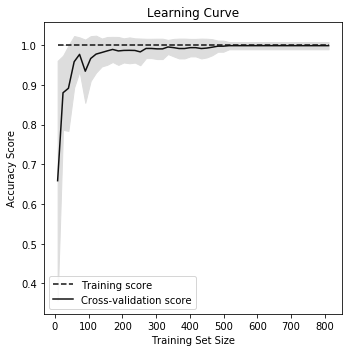

In [22]:
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [25]:
import joblib

ModuleNotFoundError: No module named 'joblib'

In [24]:
import joblib
joblib.dump(dtree, 'finalized_model.sav')
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load('finalized_model.sav')
result = loaded_model.predict(X_test)
print(result)


ModuleNotFoundError: No module named 'joblib'

In [ ]:
X_test

In [ ]:
# KNN
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(), 
                                               X, y, cv=70, scoring='accuracy', n_jobs=-1, 
                                               # 50 different sizes of the training set
                                               train_sizes=n.linspace(0.01, 1.0, 50))

train_mean = n.mean(train_scores, axis=1)
train_std = n.std(train_scores, axis=1)


test_mean = n.mean(test_scores, axis=1)
test_std = n.std(test_scores, axis=1)


plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
    
    # Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
    
    # Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [ ]:
print(df)